# Data Classification

## Importing the required libraries

In [488]:
import matplotlib.pyplot as plt, numpy as np, scipy.stats, scipy.signal, pandas as pd

from numpy import genfromtxt
from sklearn import svm
from sklearn.model_selection import train_test_split

import seaborn as sns
import scipy.stats as stats

## Loading and visualising the sample data

In [ ]:
dataset = []

In [ ]:
dataset_sample = genfromtxt('new_datasets/plastic_3.csv', delimiter=',')

In [ ]:
plt.figure(figsize=(20,10))

for i in range(4,5):
    plt.plot(dataset_sample[i],'r', linewidth=1.5)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0, 50):
    dataset.append([np.percentile(dataset_sample[i], 75) if val > np.mean(dataset_sample[i]) else np.percentile(dataset_sample[i], 25) for val in dataset_sample[i]])
for i in range(0, 50):
    plt.plot(new_list[i],'g', linewidth=0.5)
#     plt.plot(dataset_sample[i],'r', linewidth=1.5)
plt.show()

In [ ]:
len(dataset)

In [ ]:
import csv
with open("plastic_consolidated.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(dataset)

## Loading the datasets

Each of the dataset contain a total of 10,000 points in the form of 100x100 format. All the different datapoints have been collected with the apparatus being kept at a distance of 8cm from the object.

In [2]:
#dataset_ceramic = genfromtxt('new_datasets/ceramic.csv', delimiter=',')
#dataset_wood = genfromtxt('new_datasets/ceramic_2.csv', delimiter=',')
#dataset_cardboard = genfromtxt('new_datasets/cardboard.csv', delimiter=',')
dataset_plastic = genfromtxt('plastic_consolidated.csv', delimiter=',')
dataset_ceremic = genfromtxt('ceremics_consolidated.csv', delimiter=',')
dataset_wood = genfromtxt('wood_consolidated.csv', delimiter=',')

## Plotting the pulse values

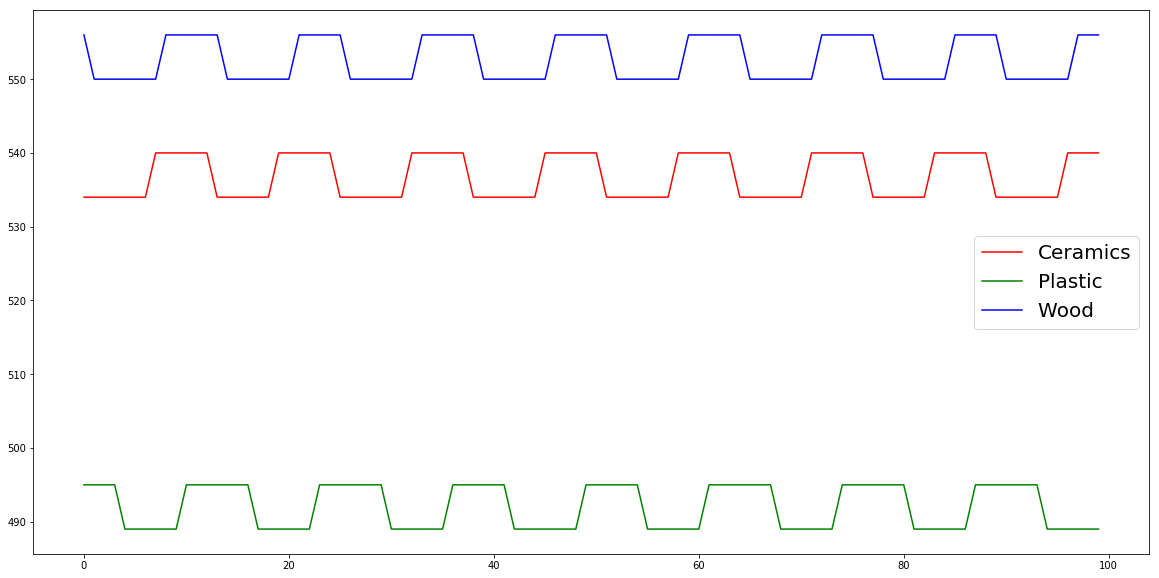

In [3]:
plt.figure(figsize=(20,10))

for i in range(1,2):
    plt.plot(dataset_ceremic[i],'r',label='Ceramics', linewidth=1.5)
    plt.plot(dataset_plastic[i],'g',label='Plastic', linewidth=1.5)
    plt.plot(dataset_wood[i],'b',label='Wood', linewidth=1.5)
plt.legend(loc='best',prop={'size': 20})
plt.show()

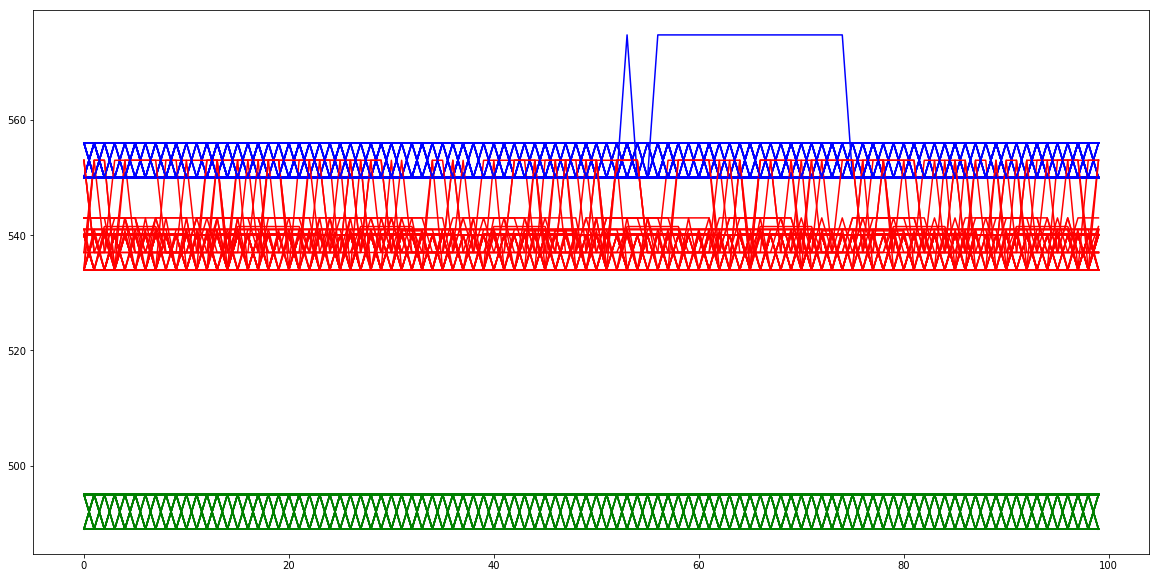

In [4]:
plt.figure(figsize=(20,10))

for i in range(0,90):
    plt.plot(dataset_ceremic[i],'r', linewidth=1.5)
    plt.plot(dataset_plastic[i],'g', linewidth=1.5)
    plt.plot(dataset_wood[i],'b', linewidth=1.5)
plt.show()

## Initialise a class ListTable

In [489]:
class ListTable(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)
    
analysis_condition = ListTable()

analysis_condition.append(['Min', 'Max', 'Range', '75%', '25%', 'Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness'])

In [494]:
#temp_data = [dataset_ceramic, dataset_wood][1]
#temp_data = [new_list, new_list1,new_list_test][0]
temp_data = [dataset_ceremic,dataset_plastic,dataset_wood][2]
for i in range(0,150):
    print(np.amin(temp_data[i]),np.amax(temp_data[i]),np.ptp(temp_data[i]),
      np.percentile(temp_data[i],75),np.percentile(temp_data[i],25),
          np.median(temp_data[i]),np.mean(temp_data[i]),np.std(temp_data[i]),
          np.var(temp_data[i]),scipy.stats.kurtosis(temp_data[i]),
          scipy.stats.skew(temp_data[i]))

550.0 556.0 6.0 556.0 550.0 550.0 552.7 2.9849623113198596 8.909999999999998 -1.959595959595971 0.2010075630517968
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.941558441558437 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.82 2.9945951312322667 8.967599999999997 -1.9855479727017338 0.12021658495507899
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.7 2.9849623113198596 8.909999999999998 -1.9595959595959713 0.20100

513.0 519.0 6.0 519.0 513.0 513.0 515.94 2.9993999399879967 8.9964 -1.9983993597439005 0.04000800240074572
513.0 519.0 6.0 519.0 519.0 519.0 518.1 2.142428528562855 4.59 1.8431372549020448 -1.960392117639246
513.0 519.0 6.0 519.0 513.0 513.0 515.88 2.9975990392312313 8.9856 -1.993589743589743 0.08006407690254817
513.0 519.0 6.0 519.0 513.0 513.0 515.82 2.9945951312322667 8.967599999999997 -1.985547972701734 0.12021658495507898
513.0 519.0 6.0 519.0 513.0 516.0 516.0 3.0 9.0 -2.0 0.0
513.0 519.0 6.0 519.0 513.0 516.0 516.0 3.0 9.0 -2.0 0.0
513.0 519.0 6.0 519.0 513.0 513.0 515.88 2.9975990392312313 8.9856 -1.993589743589743 0.08006407690254816
513.0 519.0 6.0 519.0 513.0 513.0 515.88 2.9975990392312313 8.9856 -1.993589743589743 0.08006407690254816
513.0 519.0 6.0 519.0 513.0 513.0 515.82 2.9945951312322667 8.967599999999997 -1.985547972701734 0.12021658495507898
513.0 519.0 6.0 519.0 513.0 516.0 516.0 3.0 9.0 -2.0 0.0
513.0 519.0 6.0 519.0 513.0 513.0 515.94 2.9993999399879967 8.9964 -1

In [495]:
for i in range(0,150):
    analysis_condition.append([np.amin(temp_data[i]),np.amax(temp_data[i]),np.ptp(temp_data[i]),
      np.percentile(temp_data[i],75),np.percentile(temp_data[i],25),
          np.median(temp_data[i]),np.mean(temp_data[i]),round(np.std(temp_data[i]),2),
          round(np.var(temp_data[i]),2),round(scipy.stats.kurtosis(temp_data[i]),2),
          round(scipy.stats.skew(temp_data[i]),2)])
    
analysis_condition

Min,Max,Range,75%,25%,Median,Mean,STD,Var,Kurtosis,Skewness
534.0,541.0,7.0,541.0,541.0,541.0,540.44,1.9,3.61,7.59,-3.1
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08


## Plotting the statistics associated with a single pulse value

In [21]:
def statistics_plot(single_plot_value):
    plot_analysis = [np.amin(single_plot_value), np.amax(single_plot_value),
                     np.ptp(single_plot_value), np.percentile(single_plot_value, 75),
                     np.percentile(single_plot_value, 25), np.median(single_plot_value),
                     np.mean(single_plot_value), round(np.std(single_plot_value),2),
                     round(np.var(single_plot_value),2), round(scipy.stats.kurtosis(single_plot_value),2),
                     round(scipy.stats.skew(single_plot_value),2)]

    plt.figure(figsize=(20,10))
    datapoints = np.linspace(0,100)

    plt.plot(single_plot_value, linewidth=1.8)

    plt.plot(datapoints, np.array([plot_analysis[0] for i in range(len(datapoints))]), 'r--', label = 'Min - '+str(plot_analysis[0]))
    plt.plot(datapoints, np.array([plot_analysis[1] for i in range(len(datapoints))]), 'b--', label = 'Max - '+str(plot_analysis[1]))

    plt.plot(datapoints, np.array([plot_analysis[5] for i in range(len(datapoints))]), 'g--', label = 'Median - '+str(plot_analysis[5]))
    plt.plot(datapoints, np.array([plot_analysis[6] for i in range(len(datapoints))]), 'y--', label = 'Mean - '+str(plot_analysis[6]))

    plt.legend(loc = 2, prop={'size': 20})

### Analysis for Ceramics

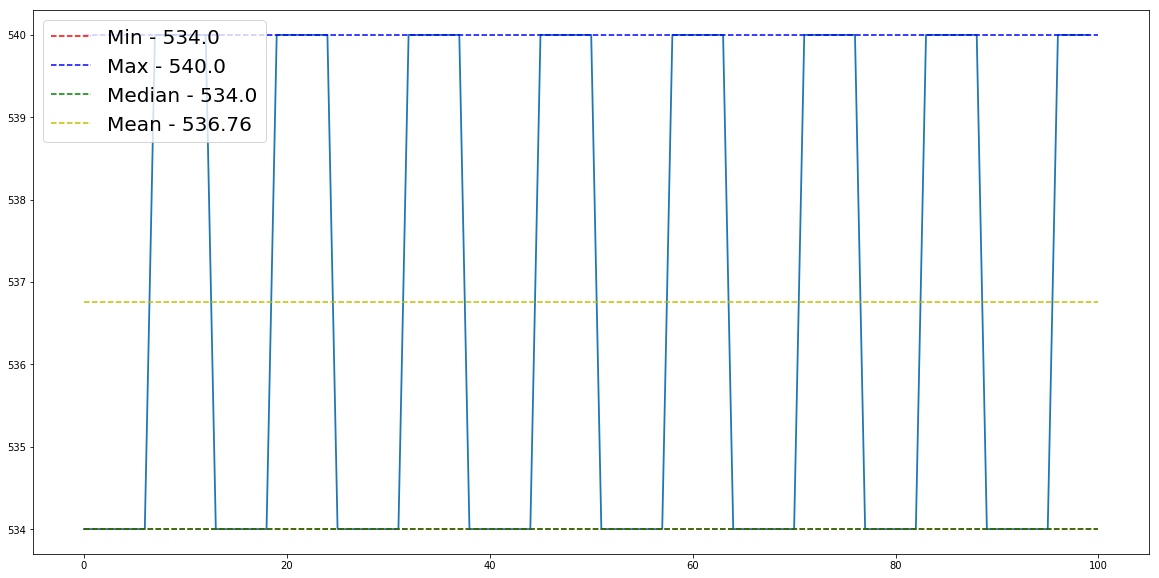

In [22]:
statistics_plot(dataset_ceremic[1])

### Analysis for Plastics

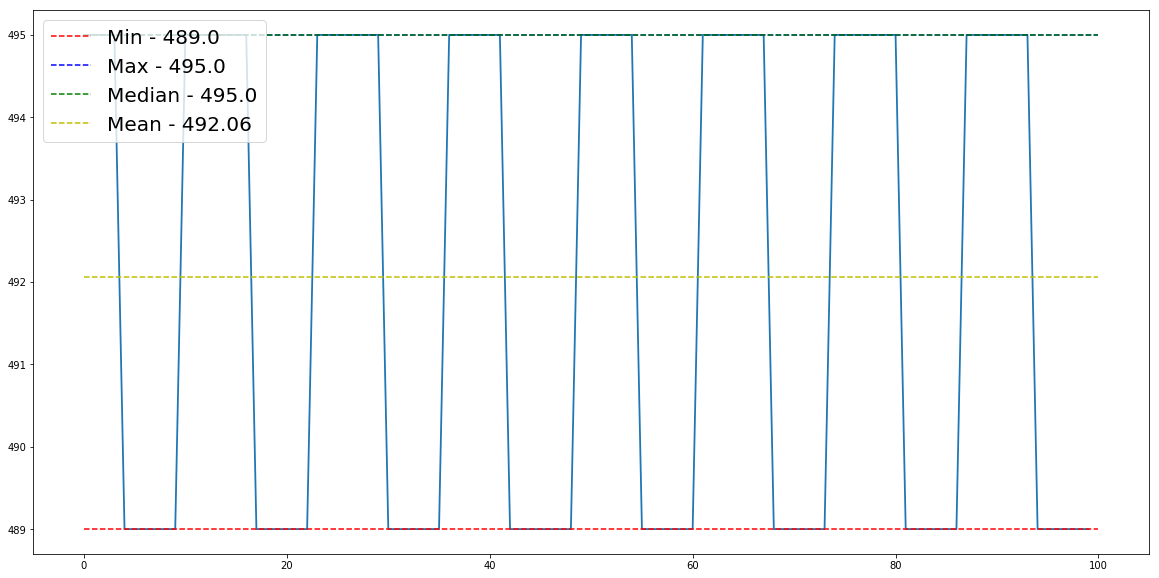

In [23]:
statistics_plot(dataset_plastic[1])

### Analysis for Wood

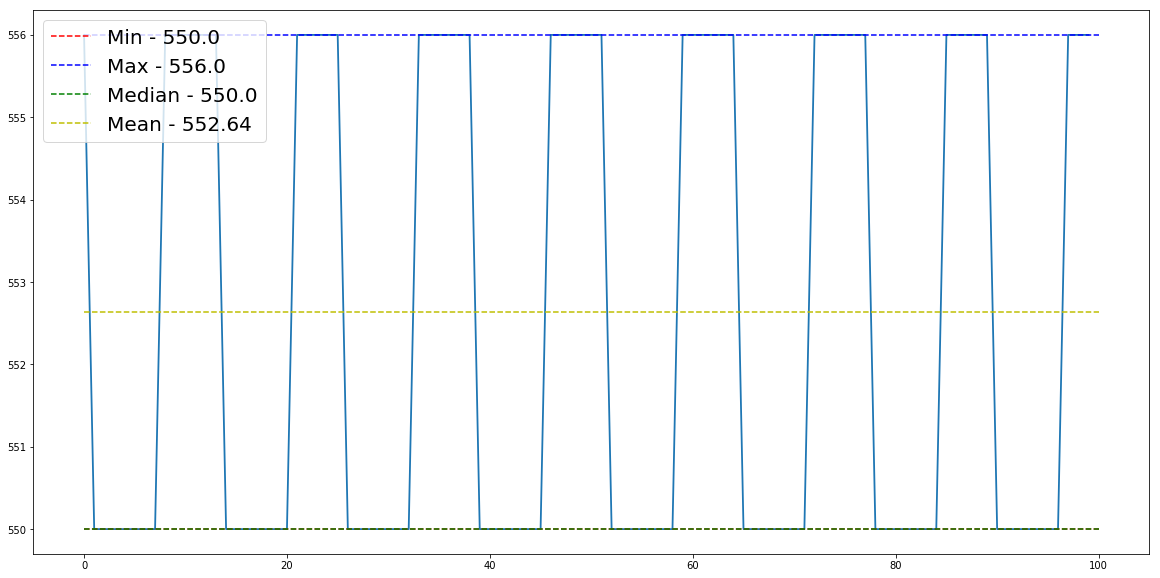

In [24]:
statistics_plot(dataset_wood[1])

## Signal Analysis : Range Analysis 

In [25]:
x_train = analysis_condition[1:]
#x_train = analysis_condition
df = pd.DataFrame(x_train)

### Bar graph representing range for Ceramics

Text(0.5,0.05,'Bar graph representing range for Ceramics Dataset')

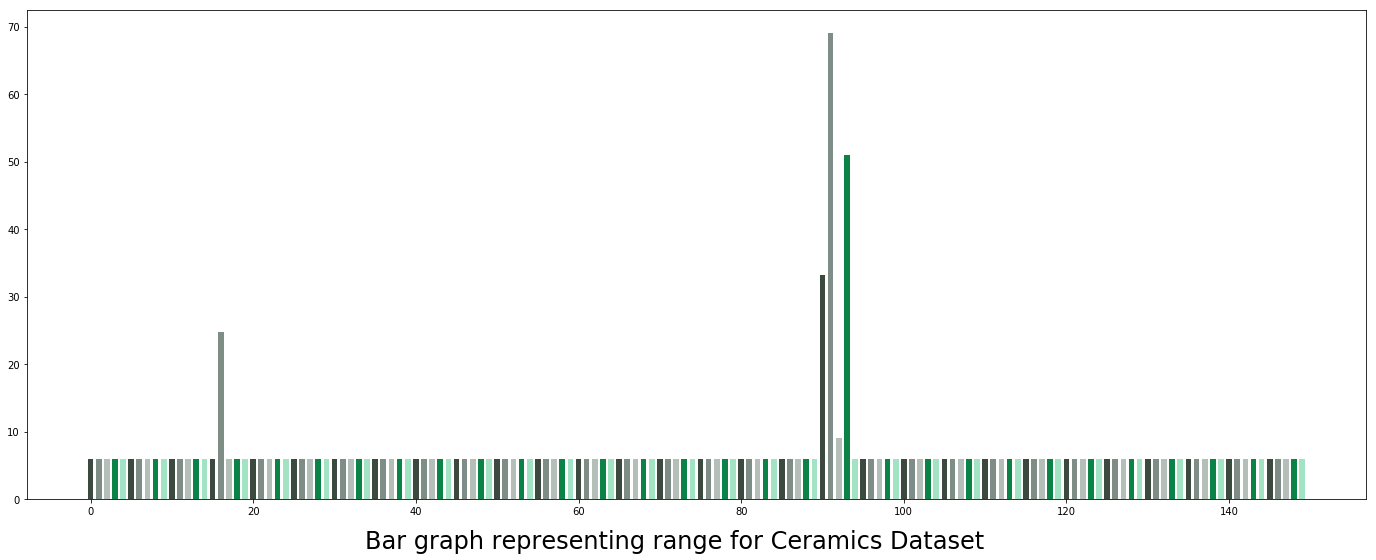

In [26]:
plt.figure(figsize=(24,9))
y_axis = np.arange(150)
plt.grid(False)
plt.bar(y_axis,df.loc[:,2][:150], width=0.7, color=['#3C493F', '#7E8D85', '#B3BFB8', '#0C8346', '#A2E3C4'])
plt.figtext(0.5, 0.05, "Bar graph representing range for Ceramics Dataset", wrap=True, horizontalalignment='center', fontsize=24)

### Bar graph representing range for Plastics

Text(0.5,0.05,'Bar graph representing range for Plastic Dataset')

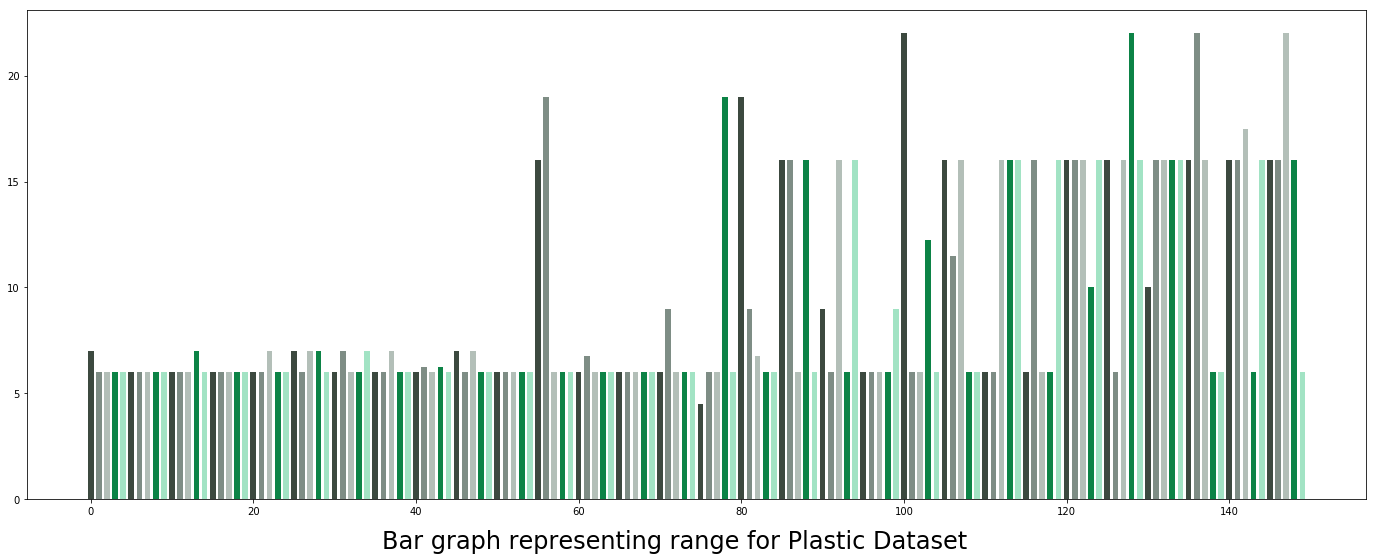

In [27]:
plt.figure(figsize=(24,9))
y_axis = np.arange(150)
plt.bar(y_axis,df.loc[:,2][150:300], width=0.7, color=['#3C493F', '#7E8D85', '#B3BFB8', '#0C8346', '#A2E3C4'])
plt.figtext(0.5, 0.05, "Bar graph representing range for Plastic Dataset", wrap=True, horizontalalignment='center', fontsize=24)

### Bar graph representing range for Wood

Text(0.5,0.05,'Bar graph representing range for Wood Dataset')

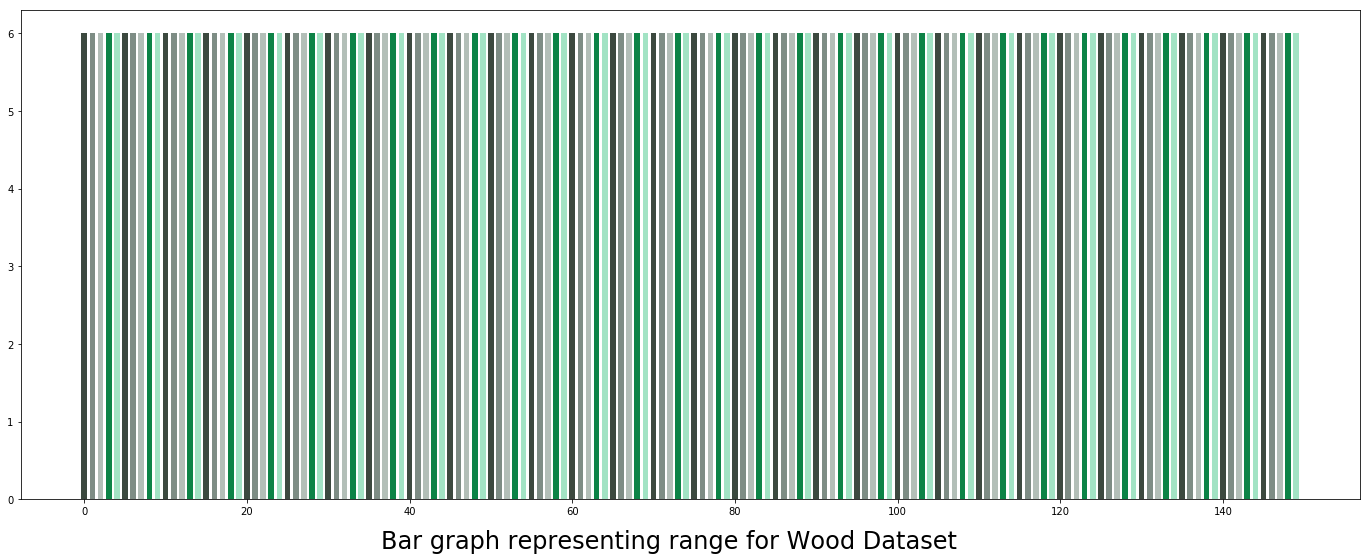

In [28]:
plt.figure(figsize=(24,9))
y_axis = np.arange(150)
plt.grid(False)
plt.bar(y_axis,df.loc[:,2][300:450], width=0.7, color=['#3C493F', '#7E8D85', '#B3BFB8', '#0C8346', '#A2E3C4'])
plt.figtext(0.5, 0.05, "Bar graph representing range for Wood Dataset", wrap=True, horizontalalignment='center', fontsize=24)

### Distribution Graph for 25 Percentile of Ceramics

[Text(0.5,0,'Distribution Curve for 25 Percentile of Ceramic')]

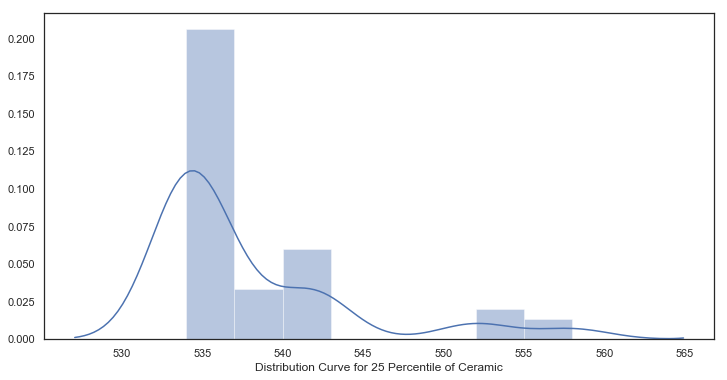

In [474]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,4][:150])
g.grid(False)
g.set(xlabel="Distribution Curve for 25 Percentile of Ceramic")

### Distribution Graph for 25 Percentile of Plastics

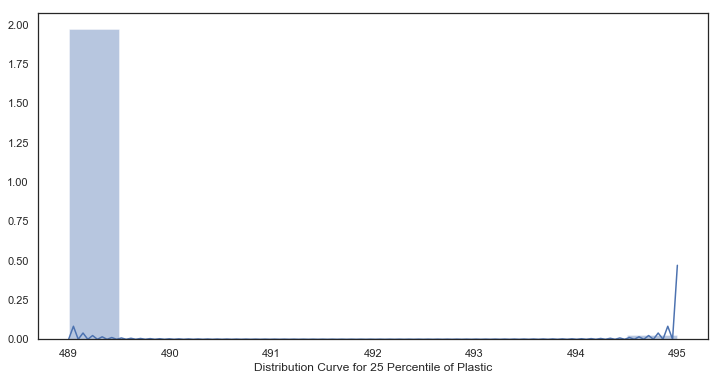

In [475]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,4][150:300])
g.set(xlabel="Distribution Curve for 25 Percentile of Plastic")
g.grid(False)

### Distribution Graph for 25 Percentile of Wood

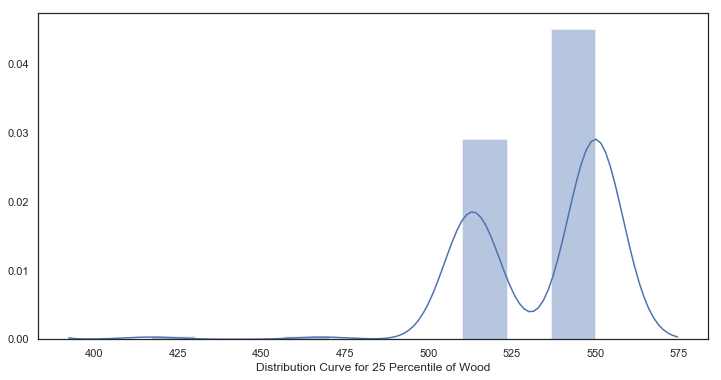

In [476]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,4][300:450])
g.set(xlabel="Distribution Curve for 25 Percentile of Wood")
g.grid(False)

### Distribution Graph for 75 Percentile of Ceramics

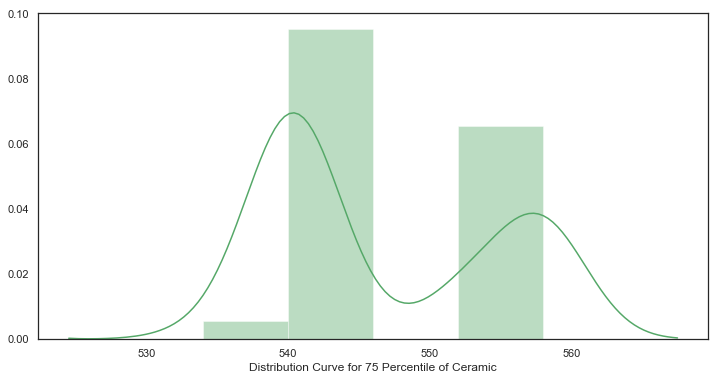

In [471]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,3][:150],color='g')
g.set(xlabel="Distribution Curve for 75 Percentile of Ceramic")
g.grid(False)

### Distribution Graph for 75 Percentile of Plastic

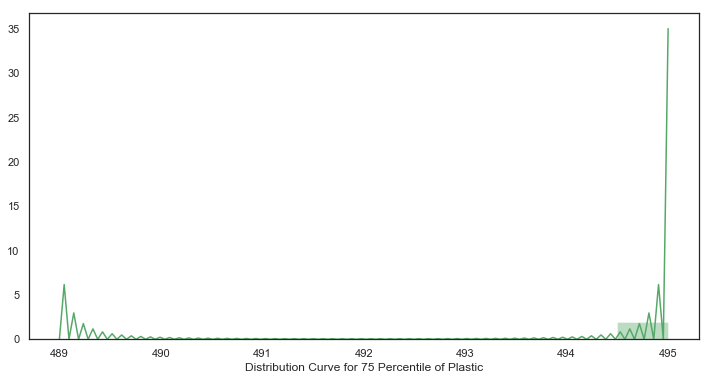

In [472]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,3][150:300],color='g')
g.set(xlabel="Distribution Curve for 75 Percentile of Plastic")
g.grid(False)

### Distribution Graph for 75 Percentile of Wood

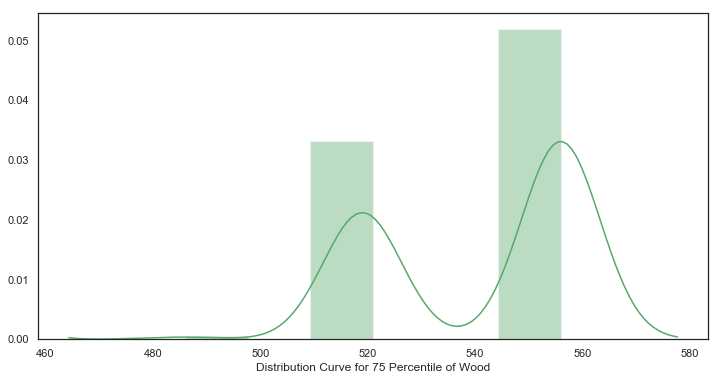

In [473]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,3][300:450],color='g')
g.set(xlabel="Distribution Curve for 75 Percentile of Wood")
g.grid(False)

## Combined Distribution Graphs

### Distribution Graph for Mean and Median of Ceramic

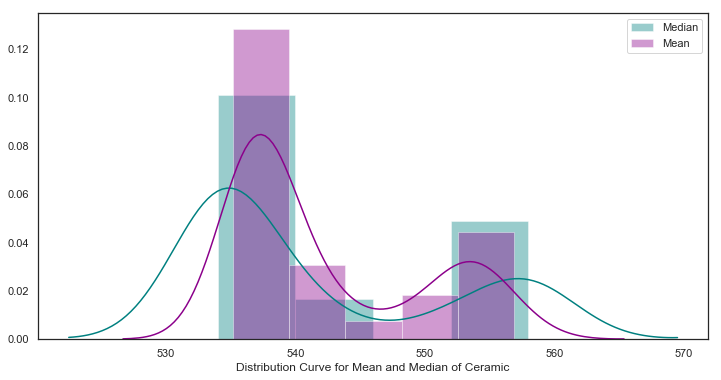

In [468]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,5][:150],color='teal',label='Median')
g = sns.distplot(df.loc[:,6][:150],color='darkmagenta',label='Mean')
g.set(xlabel="Distribution Curve for Mean and Median of Ceramic")
plt.legend()
g.grid(False)

### Distribution Graph for Mean and Median of Plastic

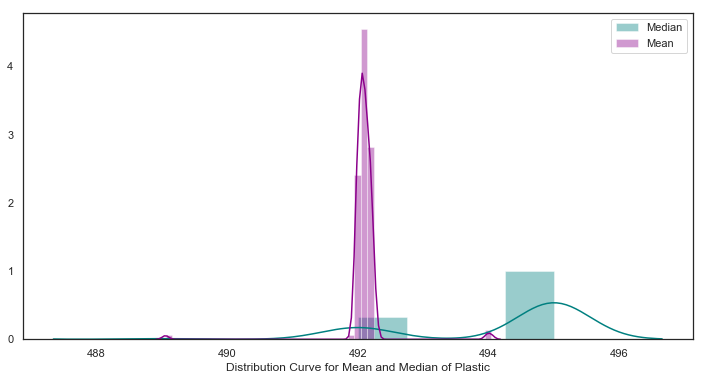

In [469]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,5][150:300],color='teal',label='Median')
g = sns.distplot(df.loc[:,6][150:300],color='darkmagenta',label='Mean')
g.set(xlabel="Distribution Curve for Mean and Median of Plastic")
plt.legend()
g.grid(False)

### Distribution Graph for Mean and Median of Wood

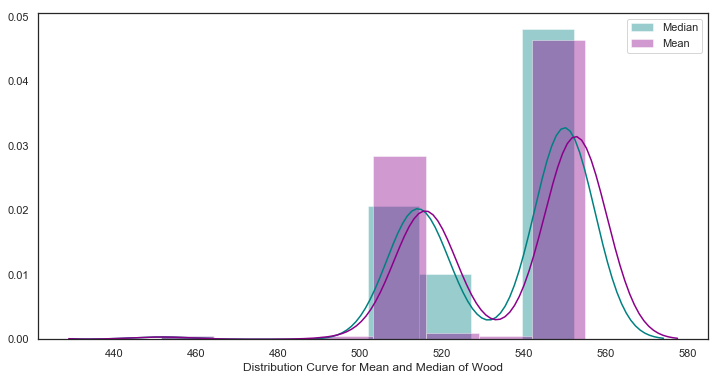

In [470]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,5][300:450],color='teal',label='Median')
g = sns.distplot(df.loc[:,6][300:450],color='darkmagenta',label='Mean')
g.set(xlabel="Distribution Curve for Mean and Median of Wood")
plt.legend()
g.grid(False)

## Correlation Tables

### Correlation Matrix for the entire dataset

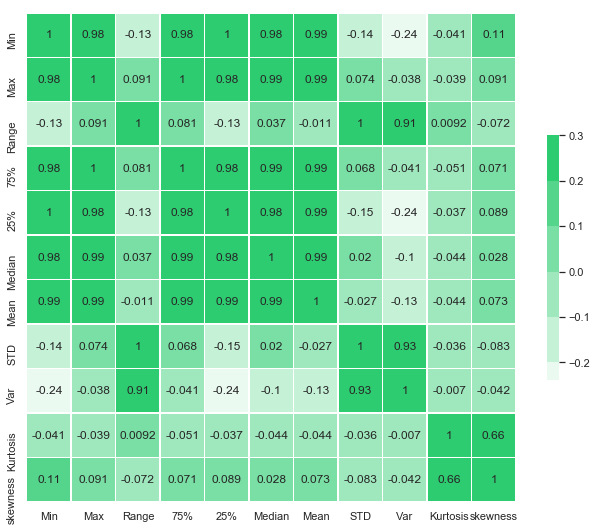

In [36]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'] )

### Correlation Matrix for Ceramic

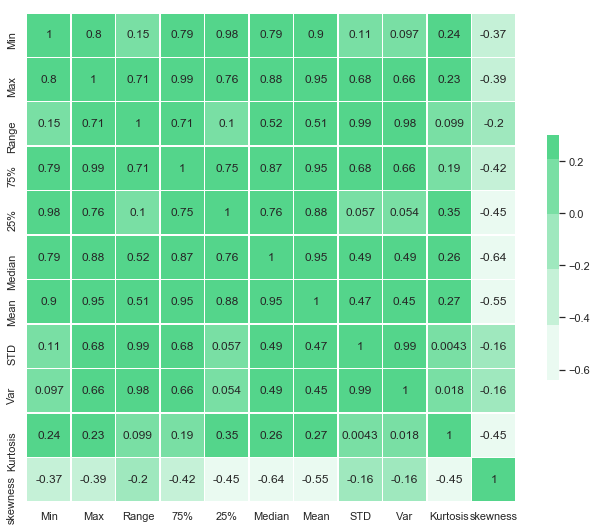

In [483]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.iloc[:150].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'] )

### Correlation Matrix for Plastic

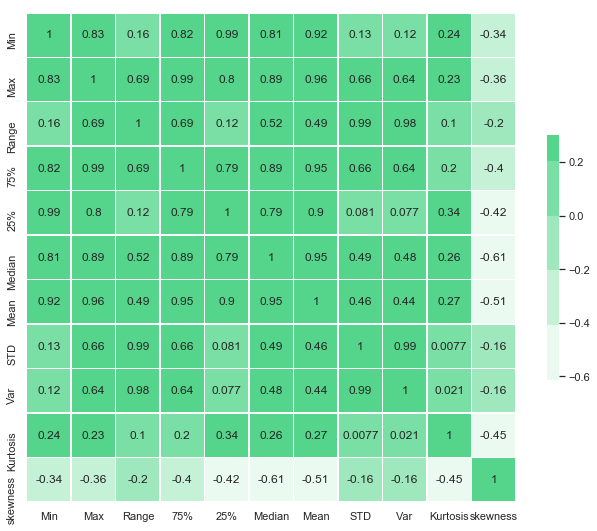

In [38]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.iloc[148:300].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'] )

### Correlation Matrix for Wood

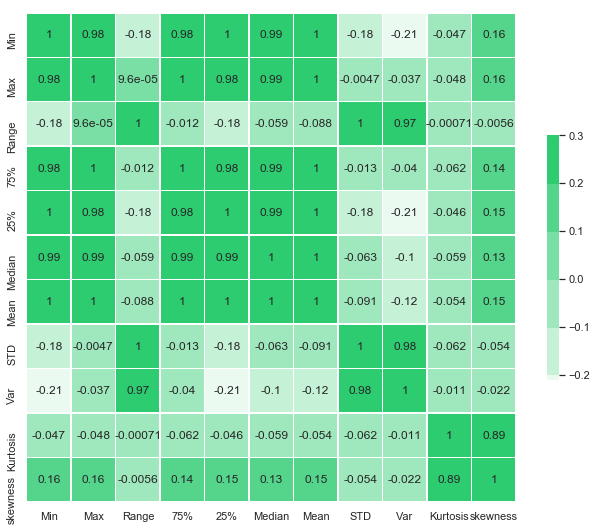

In [39]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.iloc[300:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'] )

### Plot of Varience vs Kurtosis for Ceramic

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


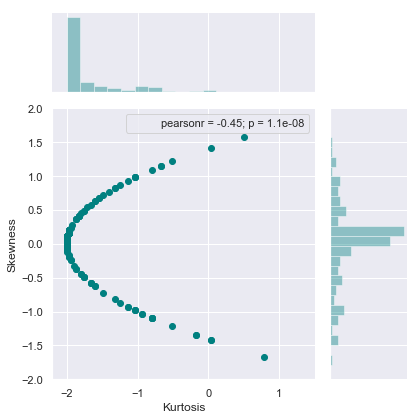

In [485]:
sns.set(style='darkgrid')
g = sns.jointplot(9, 10, data=df[:150],
                  xlim=(-2.2,1.5), ylim=(-2, 2), color="teal",ratio=3)
g.set_axis_labels('Kurtosis', 'Skewness', fontsize=12)
g.annotate(stats.pearsonr)

### Plot of Varience vs Kurtosis for Plastic

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


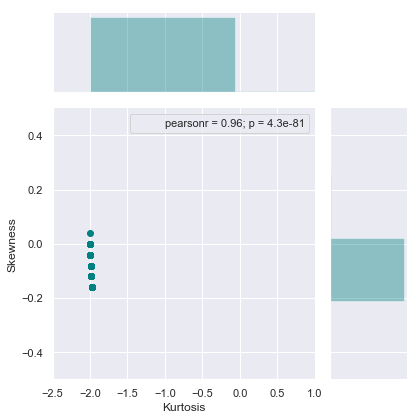

In [486]:
g = sns.jointplot(9, 10, data=df[150:300],
                  xlim=(-2.5,1), ylim=(-0.5,0.5), color="teal",ratio=3)
g.set_axis_labels('Kurtosis', 'Skewness', fontsize=12)
g.annotate(stats.pearsonr)

### Plot of Varience vs Kurtosis for Wood

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


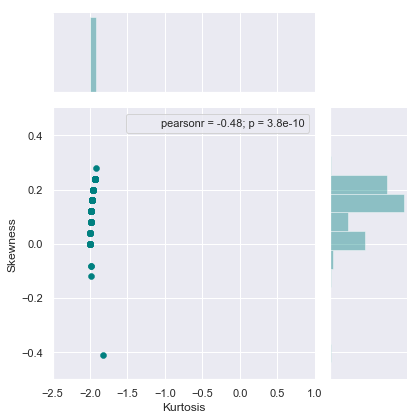

In [487]:
g = sns.jointplot(9, 10, data=df[300:450], linewidth=0.5, ratio=3,
                  xlim=(-2.5,1), ylim=(-0.5,0.5), color="teal")
g.set_axis_labels('Kurtosis', 'Skewness', fontsize=12)
g.annotate(stats.pearsonr)

## Getting ready with dataset

In [496]:
x_train = analysis_condition[1:]
df = pd.DataFrame(x_train)

### Correlation of dataframe

In [497]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.981420,0.008652,0.981265,0.999250,0.978231,0.993545,-0.011477,-0.145172,-0.036202,0.060440
1,0.981420,1.000000,0.200357,0.998688,0.980463,0.989115,0.995420,0.179651,0.027420,-0.034241,0.043829
2,0.008652,0.200357,1.000000,0.194309,0.007497,0.159908,0.114575,0.994869,0.884165,0.006403,-0.080193
3,0.981265,0.998688,0.194309,1.000000,0.980346,0.989563,0.995511,0.176302,0.025533,-0.046703,0.025969
4,0.999250,0.980463,0.007497,0.980346,1.000000,0.978407,0.993169,-0.014243,-0.145840,-0.032528,0.043708
5,0.978231,0.989115,0.159908,0.989563,0.978407,1.000000,0.992652,0.138122,-0.025071,-0.040205,-0.021243
6,0.993545,0.995420,0.114575,0.995511,0.993169,0.992652,1.000000,0.093873,-0.052523,-0.039573,0.024926
7,-0.011477,0.179651,0.994869,0.176302,-0.014243,0.138122,0.093873,1.000000,0.902920,-0.048879,-0.095768
8,-0.145172,0.027420,0.884165,0.025533,-0.145840,-0.025071,-0.052523,0.902920,1.000000,-0.009589,-0.041389
9,-0.036202,-0.034241,0.006403,-0.046703,-0.032528,-0.040205,-0.039573,-0.048879,-0.009589,1.000000,0.687921


### Making a dataframe

In [498]:
x_train_array = df.as_matrix()
len(x_train_array)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


450

### Labelling the data

In [499]:
y_train_array = []
for i in range(0,150):
    y_train_array.append('Ceremic')
for i in range(150,300):   
    y_train_array.append('Plastic')
for i in range(300,450):   
    y_train_array.append('Wood')
    
x_train_array = np.array(x_train_array)
print(x_train_array.shape)

x_train_array = x_train_array.reshape(x_train_array.shape[0],11)
print(x_train_array.shape)

(450, 11)
(450, 11)


## Testing out the Machine Learning algorithm

### Test-train split

In [373]:
x_train, x_test, y_train, y_test = train_test_split(x_train_array, y_train_array, test_size=0.20,random_state=10)

### Initialising Machine Learning algorithm

In [500]:
clf = svm.SVC(probability=True,degree=11)
clf.fit(x_train_array, y_train_array)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=11, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [501]:
from sklearn.externals import joblib
joblib.dump(clf, 'model.pkl')

['model.pkl']

In [413]:
SVM_dataframe = ListTablePrediction()
SVM_dataframe.append(['','','','SVM Parameters','','',''])
SVM_dataframe.append(['C','Cache Size','Decision Function Shape','Degree','Kernel',
                     'Probability','Tolerance'])
SVM_dataframe.append([clf.C,clf.cache_size,clf.decision_function_shape,clf.degree,
                      clf.kernel,clf.probability,clf.tol])

In [414]:
SVM_dataframe

,,,SVM Parameters,,,
C,Cache Size,Decision Function Shape,Degree,Kernel,Probability,Tolerance
1.0,200,ovr,11,rbf,True,0.001


### Confidence values of each class

In [391]:
clf.predict_proba(x_test)

array([[0.00406524, 0.00472101, 0.99121375],
       [0.95953344, 0.01659606, 0.02387051],
       [0.00738168, 0.98744923, 0.00516909],
       [0.00736555, 0.98747435, 0.0051601 ],
       [0.95524178, 0.01800608, 0.02675214],
       [0.00738168, 0.98744923, 0.00516909],
       [0.93928748, 0.02293109, 0.03778143],
       [0.00736644, 0.98747046, 0.0051631 ],
       [0.4983552 , 0.38665471, 0.11499008],
       [0.00736644, 0.98747046, 0.0051631 ],
       [0.95840675, 0.01587822, 0.02571502],
       [0.0040534 , 0.00471455, 0.99123205],
       [0.95546619, 0.01791297, 0.02662084],
       [0.0073109 , 0.98755896, 0.00513014],
       [0.0040534 , 0.00471455, 0.99123205],
       [0.95536874, 0.0179459 , 0.02668536],
       [0.95566397, 0.0178497 , 0.02648633],
       [0.00736644, 0.98747046, 0.0051631 ],
       [0.85659044, 0.04463679, 0.09877277],
       [0.00420938, 0.00484392, 0.9909467 ],
       [0.95524601, 0.01798034, 0.02677365],
       [0.00417735, 0.00482766, 0.99099499],
       [0.

### Prediction of the test datapoints

In [392]:
clf.predict(x_test)

array(['Wood', 'Ceremic', 'Plastic', 'Plastic', 'Ceremic', 'Plastic',
       'Ceremic', 'Plastic', 'Ceremic', 'Plastic', 'Ceremic', 'Wood',
       'Ceremic', 'Plastic', 'Wood', 'Ceremic', 'Ceremic', 'Plastic',
       'Ceremic', 'Wood', 'Ceremic', 'Wood', 'Ceremic', 'Ceremic',
       'Plastic', 'Wood', 'Plastic', 'Plastic', 'Ceremic', 'Plastic',
       'Plastic', 'Ceremic', 'Wood', 'Wood', 'Wood', 'Plastic', 'Wood',
       'Plastic', 'Ceremic', 'Wood', 'Ceremic', 'Wood', 'Wood', 'Ceremic',
       'Plastic', 'Wood', 'Ceremic', 'Plastic', 'Plastic', 'Wood',
       'Plastic', 'Wood', 'Wood', 'Plastic', 'Ceremic', 'Plastic',
       'Plastic', 'Wood', 'Ceremic', 'Wood', 'Plastic', 'Ceremic', 'Wood',
       'Ceremic', 'Wood', 'Ceremic', 'Plastic', 'Ceremic', 'Wood',
       'Plastic', 'Ceremic', 'Ceremic', 'Plastic', 'Ceremic', 'Wood',
       'Ceremic', 'Plastic', 'Plastic', 'Ceremic', 'Wood', 'Ceremic',
       'Ceremic', 'Ceremic', 'Wood', 'Plastic', 'Plastic', 'Ceremic',
       'Ceremic', 'P

### Score of the classifier

In [393]:
clf.score(x_test, y_test) * 100

95.55555555555556

In [235]:
print(predicted_class[380:400])
clf.predict_proba(x_train_array[380:400])

['Wood' 'Wood' 'Wood' 'Wood' 'Wood' 'Wood' 'Wood' 'Wood' 'Wood' 'Wood'
 'Ceremic' 'Wood' 'Ceremic' 'Wood' 'Wood' 'Wood' 'Wood' 'Wood' 'Wood'
 'Wood']


array([[0.0044235 , 0.00460392, 0.99097258],
       [0.0044235 , 0.00460392, 0.99097258],
       [0.0044235 , 0.00460392, 0.99097258],
       [0.00449337, 0.00463427, 0.99087235],
       [0.00449337, 0.00463427, 0.99087235],
       [0.0044235 , 0.00460392, 0.99097258],
       [0.00444949, 0.00461548, 0.99093503],
       [0.0044235 , 0.00460392, 0.99097258],
       [0.00449337, 0.00463427, 0.99087235],
       [0.00460491, 0.00468111, 0.99071399],
       [0.87387899, 0.03125219, 0.09486882],
       [0.09022188, 0.00578972, 0.9039884 ],
       [0.87371013, 0.03125171, 0.09503816],
       [0.09022195, 0.00578253, 0.90399553],
       [0.00455811, 0.00469789, 0.990744  ],
       [0.00455811, 0.00469789, 0.990744  ],
       [0.02154517, 0.0049242 , 0.97353063],
       [0.00459987, 0.0047199 , 0.99068022],
       [0.00459987, 0.0047199 , 0.99068022],
       [0.00459278, 0.00471331, 0.99069392]])

In [231]:
predicted_dataframe = ListTable()

predicted_dataframe.append(['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness','Class'])
predicted_class = clf.predict(x_train_array)
for i in range(0,450):
    predicted_dataframe.append([x_train_array[i][0],x_train_array[i][1],x_train_array[i][2],
                                x_train_array[i][3],x_train_array[i][4],x_train_array[i][5],
                                x_train_array[i][6],x_train_array[i][7],x_train_array[i][8],
                                x_train_array[i][9],x_train_array[i][10],predicted_class[i]])
    
predicted_dataframe

Min,Max,Range,75%,25%,Median,Mean,STD,Var,Kurtosis,Skewness,Class
534.0,541.0,7.0,541.0,541.0,541.0,540.44,1.9,3.61,7.59,-3.1,Ceremic
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16,Ceremic
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2,Ceremic
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12,Ceremic
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08,Ceremic
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08,Ceremic
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12,Ceremic
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2,Ceremic
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16,Ceremic
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08,Ceremic


In [211]:
predicted_dataframe = pd.DataFrame(predicted_dataframe[1:])

## Working with the filtered dataset

### Loading the filtered dataset

In [367]:
for i in range(0, 50):
    new_list1 = [np.percentile(dataset_ceramic[i], 75) if val > np.mean(dataset_ceramic[i]) else np.percentile(dataset_ceramic[i], 25) for val in dataset_ceramic[i]]
print(new_list1)

NameError: name 'dataset_ceramic' is not defined

### Plotting the filtered dataset

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(new_list1,'r', linewidth=0.5)
plt.plot(dataset_ceramic[49],'g', linewidth=1.5)
plt.show()

In [ ]:
new_list = []
new_list1 = []
for i in range(0, 50):
    new_list.append([np.percentile(dataset_wood[i], 75) if val > np.mean(dataset_wood[i]) else np.percentile(dataset_wood[i], 25) for val in dataset_wood[i]])
    new_list1.append([np.percentile(dataset_ceramic[i], 75) if val > np.mean(dataset_ceramic[i]) else np.percentile(dataset_ceramic[i], 25) for val in dataset_ceramic[i]])

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0,50):
    plt.plot(new_list[i],'b', linewidth=0.5)
    plt.plot(new_list1[i],'r', linewidth=0.5)
    plt.plot(new_list_test[i],'g', linewidth=1.5)
plt.show()

### Plotting the datapoints of a single pulse

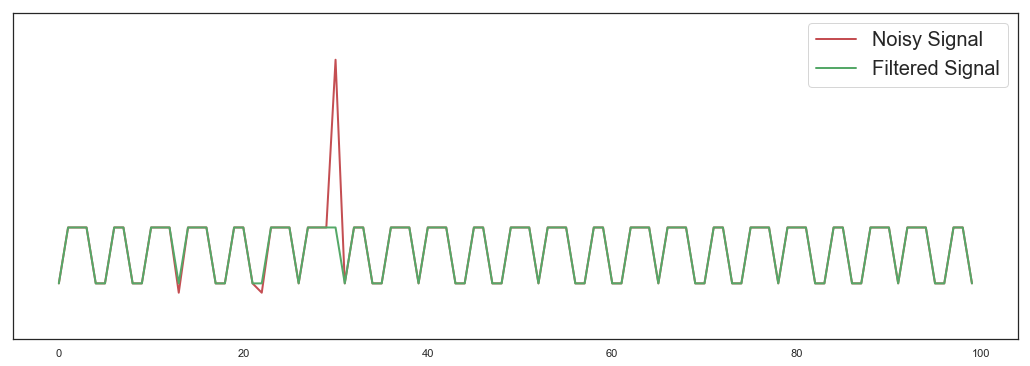

In [365]:
from pylab import *
dataset_ceramic_8cm = genfromtxt('datasets/ceramic_8.csv', delimiter=',')
filter_dataset_ceramic_8cm = genfromtxt('datasets/filtered_ceramic_8.csv', delimiter=',')
plt.figure(figsize=(18,6))
sns.set(style='white')

plt.plot(dataset_ceramic_8cm[10],'r',label='Noisy Signal', linewidth=2)
plt.plot(filter_dataset_ceramic_8cm[10],'g',label='Filtered Signal', linewidth=2)
plt.legend(loc='best',prop={'size': 20})
plt.yticks([])
plt.ylim(405,440)
plt.show()


In [366]:
new_list_test = []
y_test = []
for i in range(0, 50):
    new_list_test.append([np.percentile(dataset_sample[i], 75) if val > np.mean(dataset_sample[i]) else np.percentile(dataset_sample[i], 25) for val in dataset_sample[i]])
    y_test.append('Ceramic')

NameError: name 'dataset_sample' is not defined

In [ ]:
clf.predict(new_list_test)

### For the poster

In [291]:
class ListTablePrediction(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            elif(row_count == 2):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
                
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th align = 'center'>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)
    
prediction_table = ListTablePrediction()
prediction_table.append(['','','Prediction Table','',''])
prediction_table.append(['S.No.','Ceramics', 'Plastic', 'Wood','Class'])
prediction_table

,,Prediction Table,,
S.No.,Ceramics,Plastic,Wood,Class


In [292]:
predicted_array = clf.predict_proba(x_test[:10])
predicted_class = clf.predict(x_test[:10])
predicted_array

array([[0.00443633, 0.00460995, 0.99095373],
       [0.9675431 , 0.01021192, 0.02224498],
       [0.00637232, 0.98815817, 0.00546951],
       [0.00635729, 0.98818264, 0.00546007],
       [0.96385116, 0.01117966, 0.02496919],
       [0.00637232, 0.98815817, 0.00546951],
       [0.94993031, 0.01463856, 0.03543113],
       [0.00635813, 0.98817861, 0.00546325],
       [0.55744622, 0.33509563, 0.10745815],
       [0.00635813, 0.98817861, 0.00546325]])

In [293]:
for i in range(0,10):
    prediction_table.append([i+1,round(predicted_array[i][0],5), round(predicted_array[i][1],5),round(predicted_array[i][2],5),predicted_class[i]])

In [295]:
prediction_table

,,Prediction Table,,
S.No.,Ceramics,Plastic,Wood,Class
1,0.00444,0.00461,0.99095,Wood
2,0.96754,0.01021,0.02224,Ceremic
3,0.00637,0.98816,0.00547,Plastic
4,0.00636,0.98818,0.00546,Plastic
5,0.96385,0.01118,0.02497,Ceremic
6,0.00637,0.98816,0.00547,Plastic
7,0.94993,0.01464,0.03543,Ceremic
8,0.00636,0.98818,0.00546,Plastic
9,0.55745,0.3351,0.10746,Ceremic
